In [2]:
print('Hello')

Hello


In [3]:
!pip install pandas

In [76]:
import numpy as np
import pandas as pd


In [3]:
import pandas as pd

# Define the data dictionary
data = {
    "student_id": [101, 102, 103, 104, 105],
    "name": ["Alice Smith", "Bob Johnson", "Carol Lee", "David Kim", "Eva Brown"],
    "cgpa": [8.7, 6.5, 9.1, 7.2, 8.4],
    "iq": [130, 115, 140, 120, 125],
    "placement": [1, 0, 1, 0, 1]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


   student_id         name  cgpa   iq  placement
0         101  Alice Smith   8.7  130          1
1         102  Bob Johnson   6.5  115          0
2         103    Carol Lee   9.1  140          1
3         104    David Kim   7.2  120          0
4         105    Eva Brown   8.4  125          1


In [4]:
print(data)


{'student_id': [101, 102, 103, 104, 105], 'name': ['Alice Smith', 'Bob Johnson', 'Carol Lee', 'David Kim', 'Eva Brown'], 'cgpa': [8.7, 6.5, 9.1, 7.2, 8.4], 'iq': [130, 115, 140, 120, 125], 'placement': [1, 0, 1, 0, 1]}


In [5]:
df = pd.read_csv('student_dataset.csv')
                 

In [6]:
df

,student_id,name,cgpa,iq,placement
0,101,Alice Smith,8.7,130,1
1,102,Bob Johnson,6.5,115,0
2,103,Carol Lee,9.1,140,1
3,104,David Kim,7.2,120,0
4,105,Eva Brown,8.4,125,1


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(5, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  5 non-null      int64  
 1   name        5 non-null      object 
 2   cgpa        5 non-null      float64
 3   iq          5 non-null      int64  
 4   placement   5 non-null      int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 332.0+ bytes


In [10]:
df = df.iloc[:,1:]

In [11]:
df

,name,cgpa,iq,placement
0,Alice Smith,8.7,130,1
1,Bob Johnson,6.5,115,0
2,Carol Lee,9.1,140,1
3,David Kim,7.2,120,0
4,Eva Brown,8.4,125,1


## Steps :

1. Preprocess + EDA + Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train test spilt
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [12]:
import matplotlib.pyplot as plt

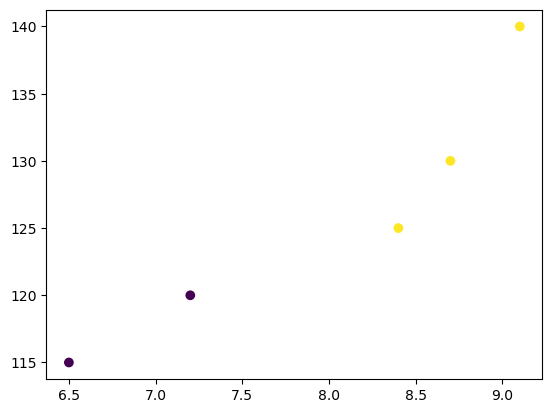

In [15]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

In [37]:
X = df.iloc[:,1:3]
Y = df.iloc[:,-1]

In [38]:
X

,cgpa,iq
0,8.7,130
1,6.5,115
2,9.1,140
3,7.2,120
4,8.4,125


In [40]:
Y.shape

(5,)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [42]:
X_train

,cgpa,iq
1,6.5,115
4,8.4,125
0,8.7,130
2,9.1,140


In [43]:
X_test

,cgpa,iq
3,7.2,120


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_train

array([[-1.67762334, -1.38675049],
       [ 0.22535239, -0.2773501 ],
       [ 0.52582224,  0.2773501 ],
       [ 0.92644871,  1.38675049]])

In [49]:
X_test = scaler.transform(X_test)

In [50]:
X_test

array([[-0.97652702, -0.83205029]])

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
clf = LogisticRegression()

In [54]:
#model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [57]:
Y_pred = clf.predict(X_test)

In [59]:
Y_test

3    0
Name: placement, dtype: int64

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(Y_test, Y_pred)

0.0

In [66]:
!pip install mlxtend


In [69]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

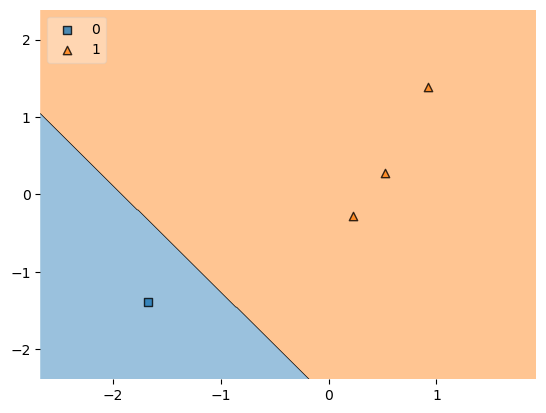

In [84]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [88]:
import pickle
with open('C:/Users/I3/100 days of ml/model.pkl', 'rb') as file:
    model = pickle.load(file)

In [91]:
pickle.dump(clf,open('model.pkl','wb'))